In [1]:
#import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Model,Input
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler 
from keras.callbacks import ModelCheckpoint
import os


In [2]:
#load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

#normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255


#print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)


#Reshape from (28,28) to (28,28,1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)


#Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

11493376/11490434 [==============================] - 0s 0us/step
Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


In [5]:
def MiniModel(input_shape):
  images = Input(input_shape)
  net =Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(images)
  net =Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net =Conv2D(filters=128,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model


input_shape = (28,28,1)
model = MiniModel(input_shape)
#Print a Summary of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
flatten (Flatten)            (None, 25088)            

In [6]:
def lr_schedule(epoch):
  lr = 0.1
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5

  print("Learning Rate: ",lr)
  return lr


In [7]:

#Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

#Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'mnistsavedmodels')

#Name of model files
model_name = 'mnistmodel.{epoch:03d}.h5'


#Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

#Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,monitor='val_acc',verbose=1,save_best_only=True,period=1)

#Specify the training components
model.compile(optimizer=SGD(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])
#Fit the model
model.fit(train_x,train_y,batch_size=32,epochs=2,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])
#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Learning Rate:  0.1
Learning Rate:  0.1
Epoch 1/2
1688/1688 [==============================] - 591s 350ms/step - loss: 0.1699 - accuracy: 0.9474 - val_loss: 0.0560 - val_accuracy: 0.9845
Learning Rate:  0.1
Epoch 2/2
313/313 [==============================] - 28s 89ms/step - loss: 0.0350 - accuracy: 0.9879
Accuracy:  0.9879000186920166


In [8]:
model.save('mnistmodel.h5')

In [9]:
model.load_weights('mnistmodel.h5')

In [10]:
test_img = test_x[4]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
test_img = test_img.reshape(28,28)

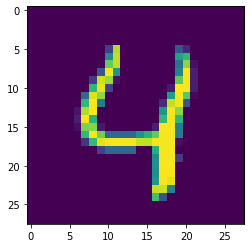

In [13]:
plt.imshow(test_img)

In [15]:
import numpy as np
test_img = test_img.reshape(1,28,28,1)
test_img.shape
img_class = np.argmax(model.predict(test_img),axis=-1)
classname = img_class[0]
print("class :",classname)

class : 4


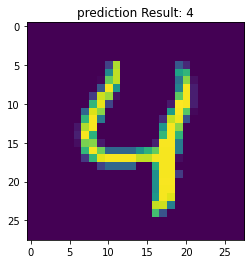

In [16]:
plt.title("prediction Result: %s"%(classname))
test_img = test_img.reshape(28,28)
plt.imshow(test_img)
plt.show()